# Monte Carlo

Aquí en este documento se verán cuatro variantes del método de Monte Carlo y se van a comparar con respecto a su varianza para ver cuál es el que tiene la mínima varianza.

Para ilustrar el funcionamiento de estos métodos, se resolverá esta integral.

$$\int_{0}^{1}\dfrac{e^x-1}{e-1}dx$$

# Monte Carlo estratificado

El siguiente código solo sirve para una variable aleatoria uniforme $X \sim U(0,1)$ o para integrales definidas donde el intervalo de integración sea $[0,1]$


Primero se van a importar las librerías que se van a ocupar para este método.

In [ ]:
from math import *
from random import random

Definimos la función.

In [ ]:
f = lambda x : (exp(x)-1)/(e-1)

Definimos una función que regrese una lista con números aleatorios que siguen una distribución uniforme. $X \sim U(a,b)$

La función ```u(a,b,n)``` retorna una lista con números aleatorios que siguen una distribución uniforme en el intervalo $(a, b)$ y la función tiene como parámetros los siguientes:

*   ```a```: Limite inferior.
*   ```b```: Limite superior.
*   ```n```: Cantidad de números aleatorios a generar.

Técnicamente, lo que regresa ```u(a,b,n)``` es un generador, pero para ver los valores simplemente se utiliza la función ```list()```.

In [ ]:
u = lambda a,b,n: ((b-a)*random()+a for i in range(n))

Un ejemplo de prueba para ver funcionamiento de ```u(a,b,n)```

In [ ]:
print(u(0,0.5,10)) # Generador
print(list(u(0,0.5,10))) # Lista

<generator object <lambda>.<locals>.<genexpr> at 0x7e20a95ebdf0>
[0.47566262662846803, 0.4201675948362208, 0.3051752480436873, 0.16969537920434374, 0.12632433540359, 0.2690373412233583, 0.36001022023195645, 0.494909245571375, 0.16377715589734326, 0.20214163819276498]


Para el estimador del método de Monte Carlo estratificado, se va a definir la siguiente función con el nombre de ```estratificado(M,N)``` y los parámetros son los siguientes:

*   ```M```: Número de subintervalos.
*   ```N```: Cantidad de números aleatorios por intervalo.



In [ ]:
def estratificado(M,N):
	s = 0
	for j in range(M):
		s+=sum([f(k) for k in u((j/M),(j+1)/M,N)])
	return s/(M*N)

Pasamos los parametros con ```M=4 N=20``` se imprime el resultado estimado.

In [ ]:
print(estratificado(4,20))
print(1-1/(e-1))

0.4036526810591045
0.41802329313067355


# Monte Carlo muestreo importancia

Primero empezamos importando las librerías.

In [215]:
from random import random
from math import *
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

Graficamos la función que se va a integrar.

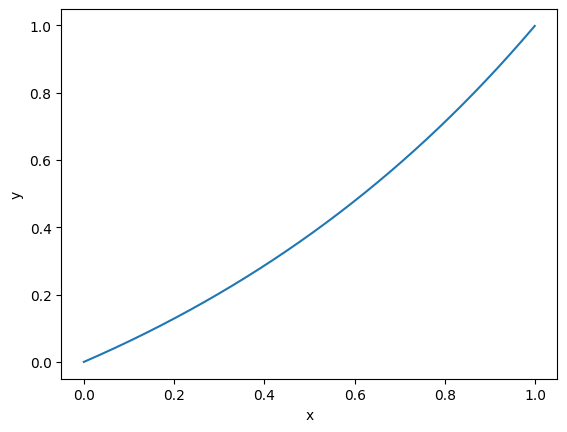

In [216]:
f1 = lambda x : (np.exp(x)-1)/(e-1)

t = np.arange(0,1,0.001)
plt.plot(t,f1(t))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

La función que se propone es la siguiente.

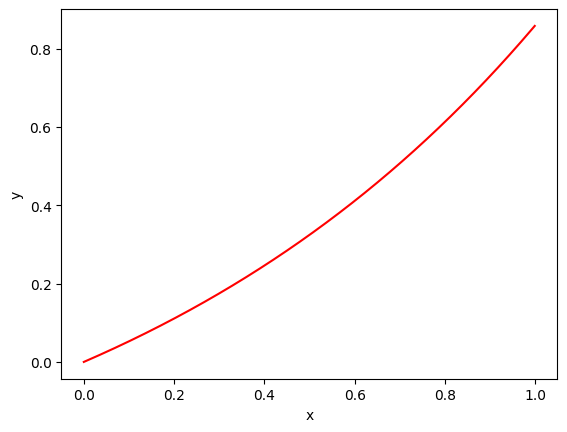

In [217]:
f2 = lambda t: 0.5*np.exp(t)-0.5

t = np.arange(0,1,0.001)
plt.plot(t,f2(t),c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Normalizamos la función.

In [218]:
g = lambda x : 0.5*exp(x)-0.5

print("Valor de la integral en el intevalo [0,1]: {0}".format(quad(g,0,1)[0]))

Valor de la integral en el intevalo [0,1]: 0.35914091422952266


Graficamos la función normalizada.

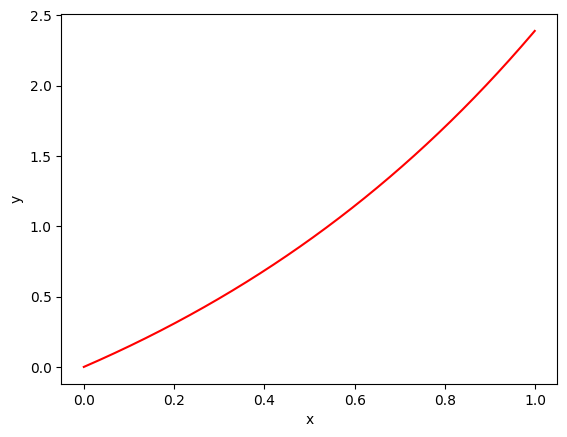

In [219]:
G = lambda t :(1/quad(g,0,1)[0])*(0.5*np.exp(t)-0.5)

t = np.arange(0,1,0.001)
plt.plot(t,G(t),c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Graficando ambas funciones para compararlas.

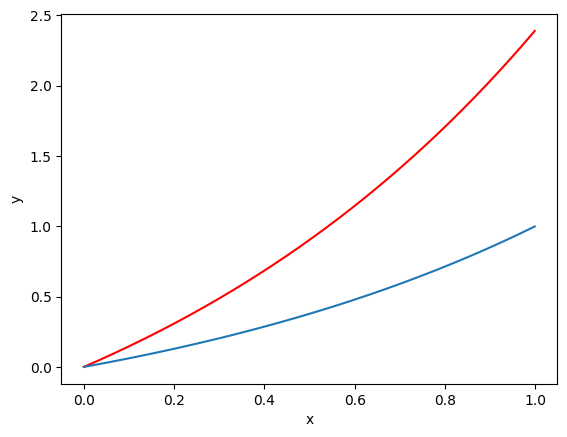

In [220]:
f1 = lambda x : (np.exp(x)-1)/(e-1)
G = lambda t :(1/quad(g,0,1)[0])*(0.5*np.exp(t)-0.5)

t = np.arange(0,1,0.001)
plt.plot(t,G(t),c="red")
plt.plot(t,f1(t))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Definimos la función ```importancia(N)``` que solo tendrá un parámetro que vendría siendo la cantidad de números aleatorios que se van a utilizar para estimar la integral.

In [230]:
f = lambda x : (exp(x)-1)/(e-1)
g1 = lambda x : (0.5*exp(x)-0.5)
g = lambda x : (1/quad(g1,0,1)[0])*(0.5*exp(x)-0.5)

def importancia(n):
	u = random()
	l = (f(u)/g(u) for i in range(n))
	return sum(l)/n

Estimamos el resultado de la integral con un millón de números aleatorios.

In [229]:
print(importancia(1000000))

0.4180232931359238


# Monte Carlo media muestral


Primero importamos las librerías que se van a usar para este método.

In [ ]:
from random import random
from math import *

Se define la función a integrar.

In [ ]:
f = lambda x : (exp(x)-1)/(e-1)

Por último, se define una función que ejecuta el método de media muestral.

Se genera una lista de números aleatorios dentro del intervalo donde se desea calcular la integral definida, en este caso el intervalo de integración es de $[0,1]$ y se van a generar números aleatorios que estén dentro de este intervalo.

La función ```media(a,b,N)``` tiene tres parámetros que son:


*   ```a```: Limite inferior.
*   ```b```: Limite superior.
*   ```N```: Cantidad de números aleatorios a generar.

Lo que regresa la función es la aproximación de la integral.

O sea:

$$\theta=\dfrac{(b-a)}{N}\sum_{i=1}^{n}g(X_i)$$

In [ ]:
def media(a,b,N):
  l = (f((b-a)*random()+a) for i in range(N))  # Generador que evalua los numeros aleatorios en la funcion f
  return (b-a)*(sum(l)/N)

Por último, le pasamos los parámetros ```a=0 b=1``` y aproximamos la integral con un millón de números aleatorios. ```N=1000000```

In [ ]:
print(media(0,1,1000000))

0.4183863104720596


# Monte Carlo acierto y error.

Este código solo sirve para integrales definidas en un intervalo de integración $[0,1]$.

Importamos las librerías.

In [166]:
from random import random
from math import *
import numpy as np
import matplotlib.pyplot as plt

Definimos la función a integrar.

In [167]:
f = lambda x : (exp(x)-1)/(e-1)

Graficamos la función.

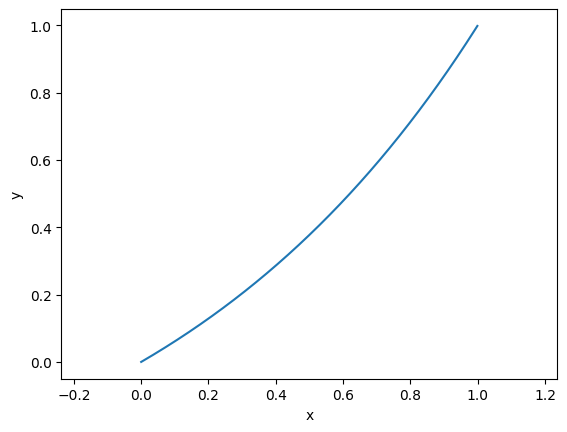

In [168]:
f1 = lambda x : (np.exp(x)-1)/(e-1)
x = np.arange(0,1,0.001)

plt.plot(x,f1(x))
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

Creamos una función que genera vectores aleatorios. Las componentes del vector siguen una distribución uniforme de parámetros cero y uno. $(X,Y)\hspace{0.5cm} X\sim U(0,1)\hspace{0.5cm} Y\sim U(0,1)$

La función tendra el siguiente nombre ```p()``` y no tendra parámetros solo bastara con llamar la función para que retorne un vector aleatorio.

In [169]:
def p():
  u = random()
  v = random()
  return (u,v)

Hacemos uso de un generador que tendrá el nombre de ```lista``` que va a generar $N$ vectores.

Creamos cuatro listas que tienen los siguientes nombres: ```l1, l2, a1, a2``` los vectores que están debajo de la función se guardarán en las listas ```a1, a2``` y los que estén por arriba de la curva se guardarán en las listas ```l1, l2```.

Ahora graficamos 50 vectores y la función para ver el funcionamiento del código.

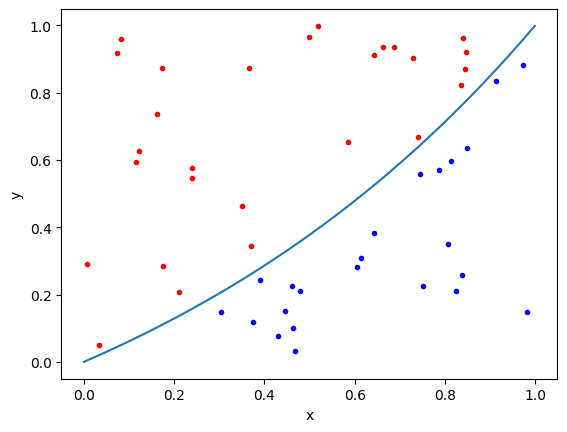

In [181]:
f1 = lambda x : (np.exp(x)-1)/(e-1)   # Funcion
x = np.arange(0,1,0.001)              # Dominio de la funcion

lista = (p() for i in range(50)) # Generador

l1 = []
l2 = []
a1 = []
a2 = []

# Filtro
for j in lista:
  if f(j[0])>j[1]:
    a1.append(j[0])
    a2.append(j[1])
  else:
    l1.append(j[0])
    l2.append(j[1])


plt.plot(x,f1(x))
plt.plot(l1,l2,".",color="red")
plt.plot(a1,a2,".",color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Creamos una función que estime la integral y tendrá el nombre de ```acierto_error(a,b,c,N)``` que tiene los siguientes parámetros:


*   ```c```: Cota para la curva
*   ```a```: Limite infereior del intervalo.
*   ```b```: Limite superior del intervalo.
*   ```N```: Cantidad de números aleatorios.

Retorna la estimación de la integral.

In [190]:
def acierto_error(a,b,c,N):
  lista = (p() for i in range(N))
  acierto = 0
  for j in lista:
    if f(j[0])>j[1]:
      acierto +=1
  return c*(b-a)*(acierto/N)

Proponemos una cota ```c=1``` y el intervalo donde se integra la función es ```a=0, b=1``` y estimamos con dos millones de números aleatorios.

In [194]:
print(acierto_error(0,1,1,2000000))

0.4174775
